1/1 [==============================] - 1s 970ms/step
[0.0009821269437946297, 7.487030265282707e-05, 0.00013734417766125983, 7.806688372519843e-05, 0.00014277038614280926]


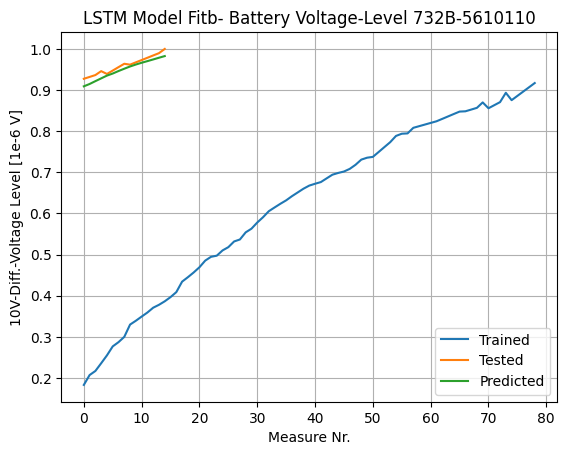

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")


# Load the voltage data extracted earlier from the image (reusing the voltage_data)
voltage_data = [
    69.03, 71.27, 73.27, 76.2, 77.57, 79.14, 81.14, 83.14, 85.28, 86.79, 87.49, 89.91, 90.91, 92.8, 94.74, 96.94, 97.98,
    99.28, 102.29, 103.23, 104.25, 105.25, 106.43, 107.14, 108, 109.03, 110.25, 112.82, 113.91, 115.07, 116.35, 117.98, 118.91,
    119.19, 120.48, 121.28, 122.68, 123.16, 124.91, 125.81, 127.32, 128.62, 130.1, 131.02, 131.92, 132.76, 133.78, 134.7, 135.62,
    136.38, 136.83, 137.24, 138.15, 139.05, 139.48, 139.83, 140.48, 141.48, 142.75, 143.22, 143.42, 144.62, 145.83, 147.03, 148.56,
    149.1, 149.18, 150.55, 150.95, 151.35, 151.75, 152.15, 152.74, 153.34, 153.94, 154.53, 154.6, 155.02, 155.45, 156.78, 155.35, 156.1,
    156.85, 159.14, 157.33, 158.38, 159.43, 160.48, 161.53, 162.58, 163.03, 163.49, 164.45, 163.76, 164.59, 165.43, 166.26, 166.04, 166.61,
    167.17, 167.73, 168.3, 168.86, 169.9
]
data = pd.DataFrame(voltage_data, columns=['Voltage'])
x = np.arange(len(voltage_data))

# Normalize data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data_scaled, seq_length)

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model = Sequential([
        LSTM(50, input_shape=(seq_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    model.fit(X_train, y_train, epochs=20, batch_size=8, verbose=0)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print(mse_scores)

x_train = np.arange(len(y_train))
x_test = np.arange(len(y_test))
#plt.figure(figsize=(12, 6))
#plt.plot(x, voltage_data, label='Measured')
plt.plot(x_train, y_train, label='Trained')
plt.plot(x_test, y_test, label='Tested')
plt.plot(x_test, y_pred, label='Predicted')

# Add future predictions to plot
#extended_steps = np.arange(len(X) - 1, len(X) - 1 + num_predictions)
#plt.plot(extended_steps, future_predictions_rescaled, label='Forecasted', color='red')

plt.title("LSTM Model Fit- Battery Voltage-Level 732B-5610110")
plt.xlabel("Measure Nr.")
plt.ylabel("10V-Diff.-Voltage Level [1e-6 V]")
plt.legend()
plt.grid(True)
#plt.tight_layout()
plt.show()


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(79, 10, 1)
(79, 1)
(15, 10, 1)
(15, 1)
(15, 1)
